# Random Forest Feature Importances

In [125]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [126]:
#resp 읽기
food_full = pd.read_csv('../food_data/food_binary.csv')

In [127]:
food_full_cp = food_full.copy()

In [160]:
feature_list = food_full.columns
feature_list = feature_list.drop(food_full.columns[0:3])
feature_list = feature_list.drop(['bmi_class','euwgt','euhgt'])
feature_list

Index(['erincome', 'ertpreat', 'ertseat', 'eudietsoda', 'eudrink', 'eueat',
       'euexercise', 'euexfreq', 'eufastfd', 'eufastfdfrq', 'euffyday',
       'eufdsit', 'eusnap', 'eugenhth', 'eugroshp', 'euinclvl', 'eumeat',
       'eumilk', 'euprpmel', 'eusoda', 'eustores', 'eustreason', 'eutherm'],
      dtype='object')

In [161]:
for feature in feature_list :
    food_full_cp = food_full_cp[~food_full_cp[feature].isnull()]
print(len(food_full_cp))
food_full_cp.head()

717


,Unnamed: 0,tucaseid,erbmi,erincome,ertpreat,ertseat,eudietsoda,eudrink,eueat,euexercise,...,euinclvl,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,bmi_class
49,51,20140101141488,21.799999,1.0,40.0,20.0,1.0,1.0,1.0,1.0,...,5,1.0,2.0,1.0,1.0,1.0,3.0,1.0,127,1
81,87,20140101142205,32.200001,1.0,30.0,30.0,1.0,1.0,1.0,1.0,...,5,1.0,2.0,1.0,1.0,1.0,1.0,2.0,165,2
95,101,20140101142378,29.000000,3.0,15.0,2.0,2.0,1.0,1.0,1.0,...,5,1.0,2.0,1.0,1.0,1.0,6.0,1.0,185,1
129,136,20140111130922,27.400000,2.0,240.0,405.0,1.0,1.0,1.0,1.0,...,5,1.0,2.0,1.0,1.0,2.0,1.0,2.0,175,1
136,143,20140111130997,26.400000,2.0,70.0,110.0,2.0,1.0,1.0,1.0,...,5,1.0,2.0,1.0,1.0,1.0,2.0,2.0,135,1


In [162]:
full_X = food_full_cp[feature_list].values
full_y = food_full_cp["bmi_class"]

In [178]:
food_forest = RandomForestClassifier(min_samples_split =2, max_depth = 3, n_estimators =5, random_state=0)
food_bbc = BalancedBaggingClassifier(base_estimator = food_forest)
food_bbc = food_bbc.fit(full_X,full_y)
print('train score : %.2f' %food_bbc.score(full_X,full_y))
# feature_importances_ for each Random Forest
forest_importances = []
for estimator in food_bbc.estimators_:
    forest_importances.append((estimator.steps[1][1].feature_importances_))
forest_importances = np.array(forest_importances)
feature_importances = forest_importances.mean(axis=0)
# print(cross_val_score(food_bbc,full_X,full_y).mean())

train score : 0.68


# Anova Test

In [14]:
feat_p = {}
for feature in feature_list:
    data = pd.DataFrame(data=food_full,columns = food_full.columns)[[feature,'bmi_class']]
    data = data[~data[feature].isnull()]
    other_value = np.array(data[data['bmi_class']==1][feature].tolist())
    obese_value  = np.array(data[data['bmi_class']==2][feature].tolist())
    f, p = stats.f_oneway(other_value, obese_value)
    feat_p[feature] = p
# sort by value
from collections import OrderedDict
feat_p = OrderedDict(sorted(feat_p.items(), key=lambda x: x[1],reverse=False))
for feature, p in feat_p.items():
    if(p<=0.05):
        print('{feature} \n F-value = {f} \n p-value = {p}'.format(feature = feature, f=f,p=p))

eugenhth 
 F-value = 0.08470070184818826 
 p-value = 0.0
euexercise 
 F-value = 0.08470070184818826 
 p-value = 4.063829987105223e-64
erincome 
 F-value = 0.08470070184818826 
 p-value = 2.845214654098719e-37
eusnap 
 F-value = 0.08470070184818826 
 p-value = 2.584581909141339e-33
eusoda 
 F-value = 0.08470070184818826 
 p-value = 7.398615557641728e-29
ertpreat 
 F-value = 0.08470070184818826 
 p-value = 3.7740963996773906e-17
euexfreq 
 F-value = 0.08470070184818826 
 p-value = 1.478060791529573e-16
eufdsit 
 F-value = 0.08470070184818826 
 p-value = 3.806524744918059e-14
eufastfd 
 F-value = 0.08470070184818826 
 p-value = 2.0429543362306338e-13
eufastfdfrq 
 F-value = 0.08470070184818826 
 p-value = 8.316551301562993e-08
euffyday 
 F-value = 0.08470070184818826 
 p-value = 0.0008095394302946757
eumeat 
 F-value = 0.08470070184818826 
 p-value = 0.0014552165280730354
eudietsoda 
 F-value = 0.08470070184818826 
 p-value = 0.001775995936639682
eustreason 
 F-value = 0.08470070184818826

# Correlation

In [15]:
# calculate correlation
food_full.corr()['erbmi'].sort_values(ascending=False)

erbmi          1.000000
euwgt          0.860445
bmi_class      0.782800
eugenhth       0.307512
euexercise     0.132688
erincome       0.107018
eufdsit        0.063868
eufastfdfrq    0.044482
eueat          0.020012
eustores       0.008721
eutherm        0.008331
Unnamed: 0     0.007428
tucaseid       0.006951
euinclvl       0.004556
ertseat       -0.005307
eudrink       -0.005496
eumilk        -0.006756
euhgt         -0.008231
eugroshp      -0.012693
euprpmel      -0.013147
euffyday      -0.024774
eustreason    -0.031172
eumeat        -0.034092
eufastfd      -0.055099
eudietsoda    -0.059500
ertpreat      -0.062020
euexfreq      -0.083219
eusnap        -0.099126
eusoda        -0.107261
Name: erbmi, dtype: float64

In [16]:
food_full.corr()['erbmi'][abs(food_full.corr()['erbmi'])>=0.09].sort_values(ascending=False).drop(['erbmi','euwgt','bmi_class'])

eugenhth      0.307512
euexercise    0.132688
erincome      0.107018
eusnap       -0.099126
eusoda       -0.107261
Name: erbmi, dtype: float64

# Estimator Performance Test and Plot

In [17]:
#resp 읽기
food_train = pd.read_csv('../food_data/food_train_1415_pure_selected.csv')
food_test = pd.read_csv('../food_data/food_test_balanced_pure_selected.csv')

In [18]:
food_train_cp = food_train.copy()
food_test_cp = food_test.copy()

In [19]:
feature_list = ['eugenhth','euexercise','erincome','eusnap','eusoda']

In [51]:
feature_list_rf = ['eugenhth','ertpreat','ertseat','euexfreq','eufastfdfrq','euexercise','erincome','eusnap','eusoda']

In [52]:
train_X= food_train_cp[feature_list].values
train_y = food_train_cp["bmi_class"]
test_X = food_test_cp[feature_list].values
test_y = food_test_cp["bmi_class"]

In [53]:
train_X_rf= food_train_cp[feature_list].values
train_y_rf = food_train_cp["bmi_class"]
test_X_rf = food_test_cp[feature_list].values
test_y_rf = food_test_cp["bmi_class"]

In [90]:
food_forest = RandomForestClassifier(min_samples_split =2, max_depth = 5, n_estimators =6, random_state=0)
food_bbc = BalancedBaggingClassifier(base_estimator = food_forest)
food_bbc = food_bbc.fit(train_X,train_y)
print('train score : %.2f' %food_bbc.score(train_X,train_y))
# feature_importances_ for each Random Forest
forest_importances = []
for estimator in food_bbc.estimators_:
    forest_importances.append((estimator.steps[1][1].feature_importances_))
forest_importances = np.array(forest_importances)
feature_importances = forest_importances.mean(axis=0)
# print(cross_val_score(food_bbc,full_X,full_y).mean())

prob_y = food_bbc.predict_proba(test_X)
prob_y = [p[1] for p in prob_y]
forest_fpr, forest_tpr, thresholds = roc_curve(test_y, prob_y, pos_label=2)
forest_auroc_score = metrics.auc(forest_fpr, forest_tpr)
print('auroc : %.5f' %forest_auroc_score)


pred_y = food_bbc.predict(test_X)
# print('총 테스트 개수 : %d, 오류 개수 : %d' %(len(test_y), (test_y != pred_y).sum()))
forest_accuracy = food_bbc.score(test_X,test_y)
print('accuracy : %.5f' %(forest_accuracy))

train score : 0.63
auroc : 0.71145
accuracy : 0.67632


In [83]:
food_forest = RandomForestClassifier(min_samples_split =2, max_depth = 5, n_estimators =6, random_state=0)
food_bbc = BalancedBaggingClassifier(base_estimator = food_forest)
food_bbc = food_bbc.fit(train_X,train_y)
print('train score : %.2f' %food_bbc.score(train_X_rf,train_y_rf))
# feature_importances_ for each Random Forest
forest_importances = []
for estimator in food_bbc.estimators_:
    forest_importances.append((estimator.steps[1][1].feature_importances_))
forest_importances = np.array(forest_importances)
feature_importances = forest_importances.mean(axis=0)
# print(cross_val_score(food_bbc,full_X,full_y).mean())

prob_y = food_bbc.predict_proba(test_X_rf)
prob_y = [p[1] for p in prob_y]
forest_fpr, forest_tpr, thresholds = roc_curve(test_y_rf, prob_y, pos_label=2)
forest_auroc_score = metrics.auc(forest_fpr, forest_tpr)
print('auroc : %.5f' %forest_auroc_score)


pred_y = food_bbc.predict(test_X)
# print('총 테스트 개수 : %d, 오류 개수 : %d' %(len(test_y), (test_y != pred_y).sum()))
forest_accuracy = food_bbc.score(test_X_rf,test_y_rf)
print('accuracy : %.5f' %(forest_accuracy))

train score : 0.63
auroc : 0.71325
accuracy : 0.67632


In [18]:
food_svm = svm.SVC()
food_bbc = BalancedBaggingClassifier(base_estimator = food_svm)
food_bbc = food_bbc.fit(train_X,train_y)
print('train score : %.2f' %food_bbc.score(train_X,train_y))

prob_y = food_bbc.predict_proba(test_X)
prob_y = [p[1] for p in prob_y]
svm_fpr, svm_tpr, thresholds = roc_curve(test_y, prob_y, pos_label=2)
svm_auroc_score = metrics.auc(svm_fpr, svm_tpr)
print('auroc : %.5f' %svm_auroc_score)

pred_y = food_bbc.predict(test_X)
# print('총 테스트 개수 : %d, 오류 개수 : %d' %(len(test_y), (test_y != pred_y).sum()))
svm_accuracy = food_bbc.score(test_X,test_y)
print('accuracy : %.5f' %(svm_accuracy))

train score : 0.63
auroc : 0.68702
accuracy : 0.67895


In [19]:
clf = MLPClassifier(hidden_layer_sizes=(5,2), random_state=1)

food_bbc = BalancedBaggingClassifier(base_estimator = clf)
food_bbc = food_bbc.fit(train_X,train_y)
print('train score : %.2f' %food_bbc.score(train_X,train_y))

prob_y = food_bbc.predict_proba(test_X)
prob_y = [p[1] for p in prob_y]
MLP_fpr, MLP_tpr, thresholds = roc_curve(test_y, prob_y, pos_label=2)
MLP_auroc_score = metrics.auc(MLP_fpr, MLP_tpr)
print('auroc : %.5f' %MLP_auroc_score)

pred_y = food_bbc.predict(test_X)
# print('총 테스트 개수 : %d, 오류 개수 : %d' %(len(test_y), (test_y != pred_y).sum()))
MLP_accuracy = food_bbc.score(test_X,test_y)
print('accuracy : %.5f' %(MLP_accuracy))

train score : 0.63
auroc : 0.69769
accuracy : 0.66842


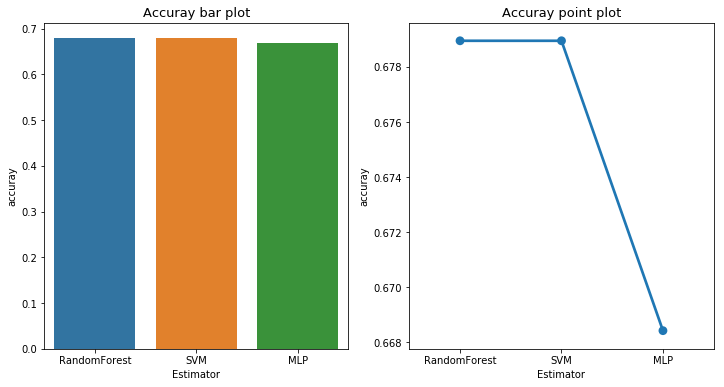

In [20]:
accuray_list = pd.DataFrame([forest_accuracy,svm_accuracy,MLP_accuracy])
accuray_list.reset_index(inplace=True)
accuray_list
accuray_list.rename(columns={'index' : 'Estimator', 0 : 'accuray'}, inplace = True)
accuray_list['Estimator'].replace(0, 'RandomForest', inplace = True)
accuray_list['Estimator'].replace(1, 'SVM', inplace = True)
accuray_list['Estimator'].replace(2, 'MLP', inplace = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(12,6))
ax1, ax2= axes.ravel()
sns.barplot(x="Estimator", y="accuray", data=accuray_list, ax=ax1).set_title("BMI for low-income people", fontsize=13)
sns.pointplot(x="Estimator", y="accuray", data=accuray_list,ax=ax2).set_title("BMI for low-income people", fontsize=13)
ax1.set_title("Accuray bar plot", fontsize=13)
ax2.set_title("Accuray point plot", fontsize=13)

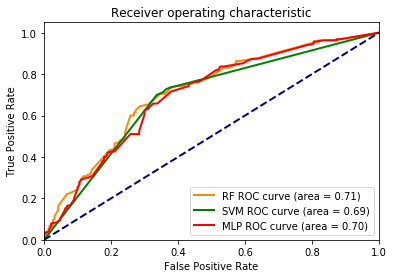

In [21]:
plt.figure()
lw = 2
plt.plot(forest_fpr, forest_tpr, color='darkorange',
         lw=lw, label='RF ROC curve (area = %0.2f)' % forest_auroc_score)
plt.plot(svm_fpr, svm_tpr, color='green',
         lw=lw, label='SVM ROC curve (area = %0.2f)' % svm_auroc_score)
plt.plot(MLP_fpr, MLP_tpr, color='red',
         lw=lw, label='MLP ROC curve (area = %0.2f)' % MLP_auroc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compare Income with Obese 

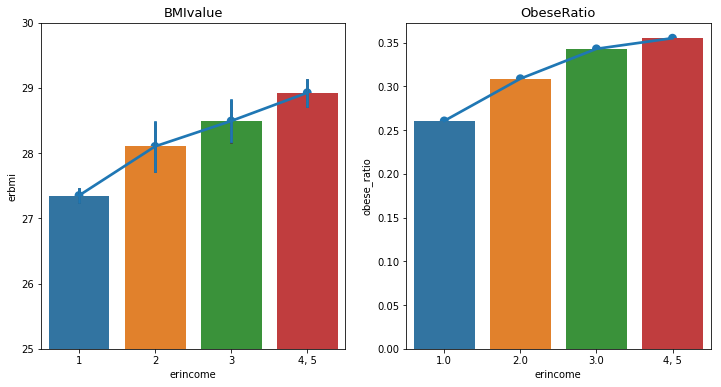

In [22]:
data_cp = food_full.copy()
data_cp['erincome'].replace(4, '4, 5', inplace = True)
data_cp['erincome'].replace(5, '4, 5', inplace = True)
# sns.barplot(x="erincome", y="erbmi", data=data_cp, order= [1,2,3,'4, 5']).set(ylim=(25, 30))

data_cp = food_full.copy()
data_cp['erincome'].replace(4, '4, 5', inplace = True)
data_cp['erincome'].replace(5, '4, 5', inplace = True)
d = data_cp[data_cp['bmi_class']==2].groupby(['erincome'])['bmi_class'].count()/data_cp.groupby(['erincome'])['bmi_class'].count()
obratio_income = pd.DataFrame(d)
obratio_income.reset_index(inplace=True)
obratio_income.rename(columns={'bmi_class' : 'obese_ratio'}, inplace = True)
# sns.barplot(x="erincome", y="obese_ratio", data=obratio_income).set(ylim=(None, None))

fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(12,6))
ax1, ax2 = axes.ravel()
sns.barplot(x="erincome", y="erbmi", data=data_cp, order= [1,2,3,'4, 5'], ax= ax1).set(ylim=(25, 30))
sns.pointplot(x="erincome", y="erbmi", data=data_cp, order= [1,2,3,'4, 5'], ax= ax1).set(ylim=(25, 30))
sns.barplot(x="erincome", y="obese_ratio", data=obratio_income, ax= ax2).set(ylim=(None, None))
sns.pointplot(x="erincome", y="obese_ratio", data=obratio_income, ax= ax2).set(ylim=(None, None))
ax1.set_title("BMIvalue", fontsize=13)
ax2.set_title("ObeseRatio", fontsize=13)

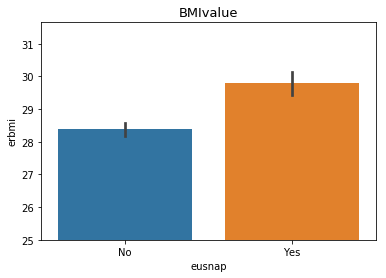

In [23]:
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
data_cp['eusnap'].replace(1, 'Yes', inplace = True)
data_cp['eusnap'].replace(2, 'No', inplace = True)
ax = plt.axes()
sns.barplot(x="eusnap", y="erbmi", data=data_cp, ax=ax)
ax.set(ylim=(25, None))
ax.set_title("BMIvalue", fontsize=13)

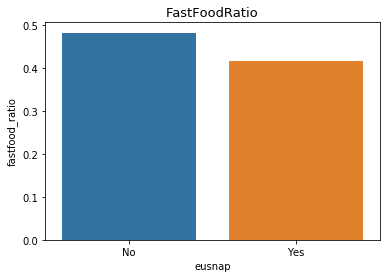

In [24]:
# (fastfood yes)/ all fast food
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
data_cp['eusnap'].replace(1, 'Yes', inplace = True)
data_cp['eusnap'].replace(2, 'No', inplace = True)
d = data_cp[data_cp['eufastfd']==1].groupby(['eusnap'])['eufastfd'].count()/data_cp.groupby(['eusnap'])['eufastfd'].count()
fstfdratio_snap = pd.DataFrame(d)
fstfdratio_snap.reset_index(inplace=True)
fstfdratio_snap.rename(columns={'eufastfd' : 'fastfood_ratio'}, inplace = True)
ax = plt.axes()
sns.barplot(x="eusnap", y="fastfood_ratio", data=fstfdratio_snap).set_title("FastFoodRatio", fontsize=13)
ax.set_title("FastFoodRatio", fontsize=13)

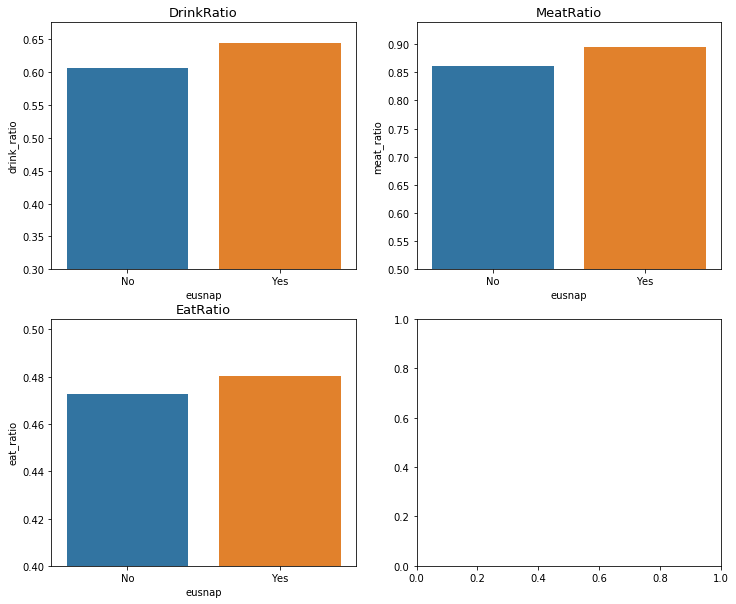

In [25]:
# eudrink
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
data_cp['eusnap'].replace(1, 'Yes', inplace = True)
data_cp['eusnap'].replace(2, 'No', inplace = True)
d = data_cp[data_cp['eudrink']==1].groupby(['eusnap'])['eudrink'].count()/data_cp.groupby(['eusnap'])['eudrink'].count()
drnkratio_snap = pd.DataFrame(d)
drnkratio_snap.reset_index(inplace=True)
drnkratio_snap.rename(columns={'eudrink' : 'drink_ratio'}, inplace = True)

# eumeat
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
data_cp['eusnap'].replace(1, 'Yes', inplace = True)
data_cp['eusnap'].replace(2, 'No', inplace = True)
d = data_cp[data_cp['eumeat']==1].groupby(['eusnap'])['eumeat'].count()/data_cp.groupby(['eusnap'])['eumeat'].count()
meatratio_snap = pd.DataFrame(d)
meatratio_snap.reset_index(inplace=True)
meatratio_snap.rename(columns={'eumeat' : 'meat_ratio'}, inplace = True)

# eueat
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
data_cp['eusnap'].replace(1, 'Yes', inplace = True)
data_cp['eusnap'].replace(2, 'No', inplace = True)
d = data_cp[data_cp['eueat']==1].groupby(['eusnap'])['eueat'].count()/data_cp.groupby(['eusnap'])['eueat'].count()
eatratio_snap = pd.DataFrame(d)
eatratio_snap.reset_index(inplace=True)
eatratio_snap.rename(columns={'eueat' : 'eat_ratio'}, inplace = True)

fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(12,10))
ax1, ax2, ax3, ax4 = axes.ravel()
sns.barplot(x="eusnap", y="drink_ratio", data=drnkratio_snap, ax= ax1).set(ylim=(0.3, None))
sns.barplot(x="eusnap", y="meat_ratio", data=meatratio_snap, ax= ax2).set(ylim=(0.5, None))
sns.barplot(x="eusnap", y="eat_ratio", data=eatratio_snap, ax= ax3).set(ylim=(0.4, None))

ax1.set_title("DrinkRatio", fontsize=13)
ax2.set_title("MeatRatio", fontsize=13)
ax3.set_title("EatRatio", fontsize=13)

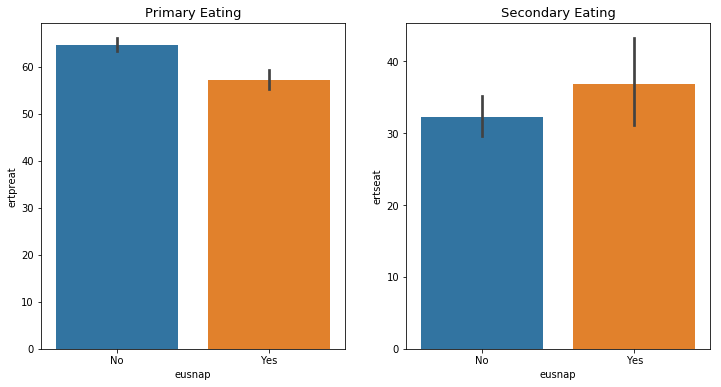

In [26]:
# ertpreat
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
data_cp['eusnap'].replace(1, 'Yes', inplace = True)
data_cp['eusnap'].replace(2, 'No', inplace = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(12,6))
ax1, ax2= axes.ravel()
sns.barplot(x="eusnap", y="ertpreat", data=data_cp, ax=ax1)
sns.barplot(x="eusnap", y="ertseat", data=data_cp, ax=ax2)
ax1.set_title("Primary Eating", fontsize=13)
ax2.set_title("Secondary Eating", fontsize=13)

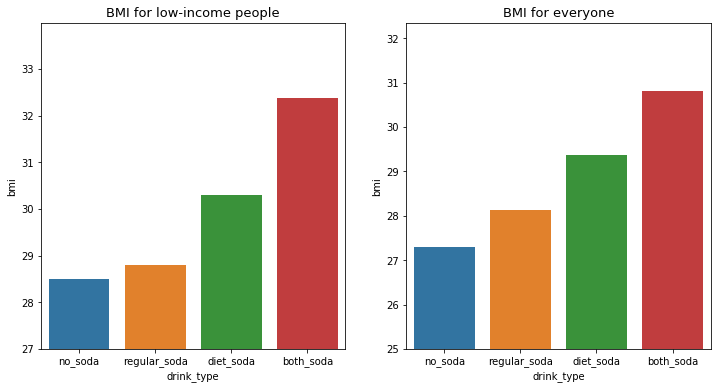

In [27]:
# low income
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
no_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==2)]['erbmi'].mean()
diet_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==1) & (data_cp['eudietsoda']==1)]['erbmi'].mean()
regular_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==1) & (data_cp['eudietsoda']==2)]['erbmi'].mean()
both_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==1) & (data_cp['eudietsoda']==3)]['erbmi'].mean()

low_income_drk_bmi = pd.DataFrame([no_soda,regular_soda,diet_soda,both_soda])
low_income_drk_bmi.reset_index(inplace=True)
low_income_drk_bmi.rename(columns={'index' : 'drink_type', 0 : 'bmi'}, inplace = True)
low_income_drk_bmi['drink_type'].replace(0, 'no_soda', inplace = True)
low_income_drk_bmi['drink_type'].replace(1, 'regular_soda', inplace = True)
low_income_drk_bmi['drink_type'].replace(2, 'diet_soda', inplace = True)
low_income_drk_bmi['drink_type'].replace(3, 'both_soda', inplace = True)

# everyone
data_cp = food_full.copy()
no_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==2)]['erbmi'].mean()
diet_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==1) & (data_cp['eudietsoda']==1)]['erbmi'].mean()
regular_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==1) & (data_cp['eudietsoda']==2)]['erbmi'].mean()
both_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==1) & (data_cp['eudietsoda']==3)]['erbmi'].mean()

drk_bmi = pd.DataFrame([no_soda,regular_soda,diet_soda,both_soda])
drk_bmi.reset_index(inplace=True)
drk_bmi.rename(columns={'index' : 'drink_type', 0 : 'bmi'}, inplace = True)
drk_bmi['drink_type'].replace(0, 'no_soda', inplace = True)
drk_bmi['drink_type'].replace(1, 'regular_soda', inplace = True)
drk_bmi['drink_type'].replace(2, 'diet_soda', inplace = True)
drk_bmi['drink_type'].replace(3, 'both_soda', inplace = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(12,6))
ax1, ax2= axes.ravel()
sns.barplot(x="drink_type", y="bmi", data=low_income_drk_bmi, ax=ax1).set(ylim=(27, None))
sns.barplot(x="drink_type", y="bmi", data=drk_bmi, ax=ax2).set(ylim=(25, None))
ax1.set_title("BMI for low-income people", fontsize=13)
ax2.set_title("BMI for everyone", fontsize=13)

[(27, 30.725865992992656)]

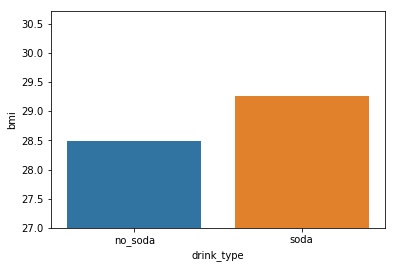

In [28]:
# low income
data_cp = food_full.copy()
data_cp = data_cp[data_cp['erincome']>=3]
no_soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==2)]['erbmi'].mean()
soda = data_cp[(data_cp['eudrink']==1) & (data_cp['eusoda']==1)]['erbmi'].mean()
low_income_drk_bmi = pd.DataFrame([no_soda,soda])
low_income_drk_bmi.reset_index(inplace=True)
low_income_drk_bmi.rename(columns={'index' : 'drink_type', 0 : 'bmi'}, inplace = True)
low_income_drk_bmi['drink_type'].replace(0, 'no_soda', inplace = True)
low_income_drk_bmi['drink_type'].replace(1, 'soda', inplace = True)
sns.barplot(x="drink_type", y="bmi", data=low_income_drk_bmi).set(ylim=(27, None))

[(1, 1.7279744346116028)]

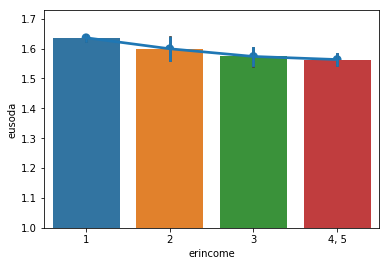

In [29]:
data_cp = food_full.copy()
data_cp['erincome'].replace(4, '4, 5', inplace = True)
data_cp['erincome'].replace(5, '4, 5', inplace = True)
sns.barplot(x="erincome", y="eusoda", data=data_cp, order=[1,2,3,'4, 5']).set(ylim=(1, None))
sns.pointplot(x="erincome", y="eusoda", data=data_cp, order=[1,2,3,'4, 5']).set(ylim=(1, None))

[(1, 1.57223113964687)]

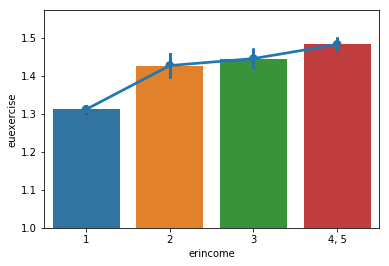

In [30]:
data_cp = food_full.copy()
data_cp['erincome'].replace(4, '4, 5', inplace = True)
data_cp['erincome'].replace(5, '4, 5', inplace = True)
sns.barplot(x="erincome", y="euexercise", data=data_cp, order=[1,2,3,'4, 5']).set(ylim=(1, None))
sns.pointplot(x="erincome", y="euexercise", data=data_cp, order=[1,2,3,'4, 5']).set(ylim=(1, None))